<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/Spotify%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:

df = pd.read_csv('/content/top50 (1).csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [5]:
df=df.drop(columns=['Unnamed: 0'])

In [13]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [8]:
df.shape

(50, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [14]:
df=df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'})
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [15]:
df.isna().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [16]:
print(df.dtypes)

track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [18]:
## Calcualating the number of songs of each genre
print(type(df['Genre']))
popular_genre = df.groupby('Genre').size().unique
print(popular_genre)

gener_list=df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>


In [21]:
## Calculate the number of songs by each of the artists
popular_artist=df.groupby('artist_name').size()
print(popular_artist)

artist_list=df['artist_name'].values.tolist()

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64


In [22]:
df.isna().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [24]:
df.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


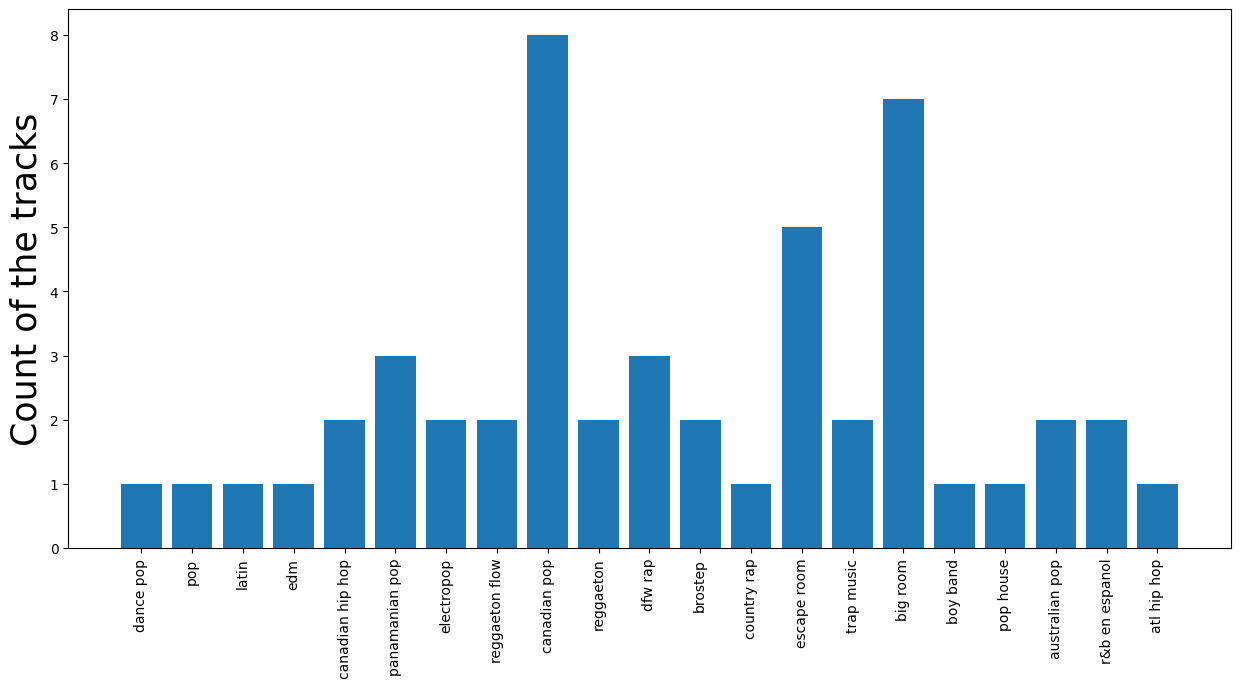

In [25]:

xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']

length=np.arange(len(xtick))
genre_groupby=df.groupby('Genre')['track_name'].agg(len)
plt.figure(figsize=(15,7))
plt.bar(length, genre_groupby)
plt.xticks(length, xtick)
plt.xticks(rotation=90)
plt.ylabel('Genre', fontsize=20)
plt.ylabel('Count of the tracks', fontsize=25)
plt.show()

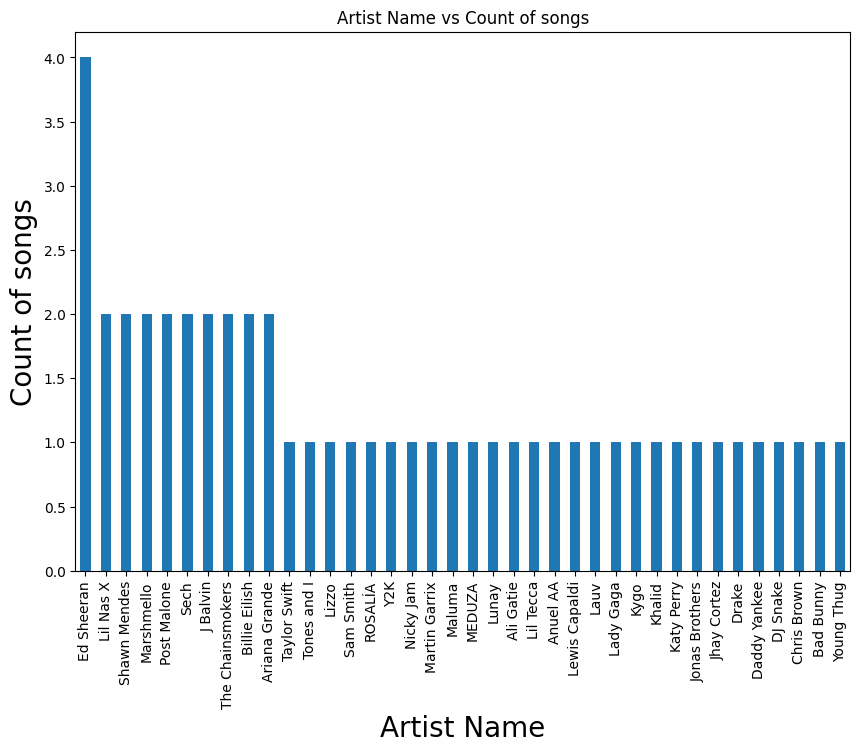

In [29]:
# No of songssung by an artist
plt.figure(figsize=(10,7))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Artist Name",fontsize=20)
plt.ylabel("Count of songs",fontsize=20)
plt.title("Artist Name vs Count of songs")
plt.show()

<Axes: xlabel='Energy', ylabel='Loudness(dB)'>

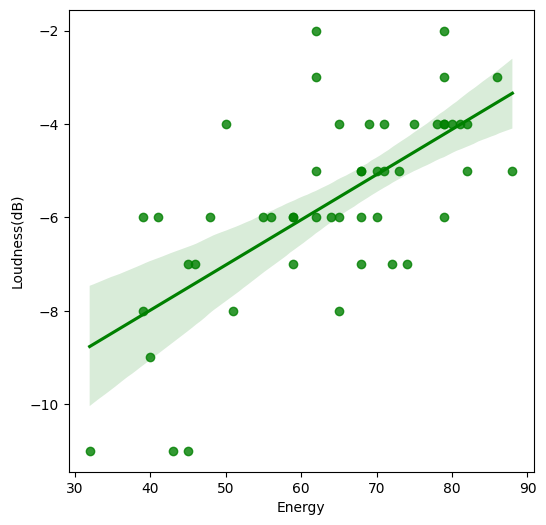

In [31]:
## Analyzing the relationship between energy and Loudness

plt.figure(figsize=(6,6))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='green')

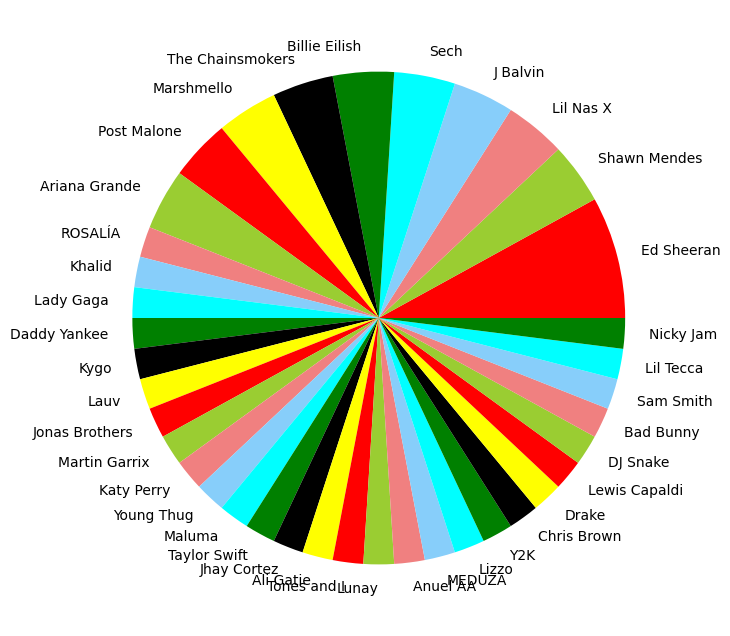

In [34]:
#pie chart

labels=df.artist_name.value_counts().index
sizes=df.artist_name.value_counts().values
colors=['red','yellowgreen','lightcoral','lightskyblue','cyan','green','black','yellow']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors)
autopct=('%1.1f%')
plt.axis=('equal')
plt.show()


In [48]:
x=df.iloc[:,[4,5,9,6,10]].values
y=df.iloc[:,-1].values

In [49]:
x

array([[ 55,  76, 191,  -6,   4],
       [ 81,  79, 302,  -4,   8],
       [ 80,  40, 186,  -4,  12],
       [ 65,  64, 198,  -8,  12],
       [ 65,  58, 175,  -4,  45],
       [ 68,  80, 220,  -5,   9],
       [ 64,  75, 131,  -6,   2],
       [ 68,  48, 202,  -5,  15],
       [ 62,  88, 157,  -6,   5],
       [ 43,  70, 194, -11,  33],
       [ 62,  61, 251,  -5,  60],
       [ 71,  82, 185,  -4,  28],
       [ 41,  50, 182,  -6,  75],
       [ 79,  73, 288,  -2,   7],
       [ 50,  83, 205,  -4,  10],
       [ 45,  70, 261,  -7,  12],
       [ 65,  75, 243,  -6,  15],
       [ 48,  76, 158,  -6,  56],
       [ 39,  84, 161,  -8,  18],
       [ 62,  72, 173,  -3,  11],
       [ 74,  68, 153,  -7,   4],
       [ 59,  70, 115,  -6,  34],
       [ 79,  81, 309,  -4,  14],
       [ 78,  80, 266,  -4,  36],
       [ 45,  67, 195, -11,  25],
       [ 82,  69, 191,  -4,  49],
       [ 59,  82, 210,  -6,  69],
       [ 46,  73, 213,  -7,  37],
       [ 86,  74, 193,  -3,  11],
       [ 79,  

In [50]:
y

array([79, 92, 85, 86, 94, 84, 92, 90, 87, 95, 93, 86, 88, 87, 92, 82, 90,
       91, 88, 91, 91, 91, 83, 91, 89, 70, 83, 89, 91, 89, 84, 89, 89, 89,
       89, 89, 91, 87, 80, 78, 88, 90, 87, 84, 88, 88, 88, 88, 88, 82])

In [51]:
# Train_Test_split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [54]:
print(x.shape,x_train.shape,x_test.shape)

(50, 5) (35, 5) (15, 5)


In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)


100.52836313644947
[-0.07925609 -0.09630952  0.00803551  0.22547735 -0.04924426]


In [59]:
from sklearn.metrics import mean_squared_error

In [62]:
y_pred=regressor.predict(x_test)

In [63]:
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE.round(2))

Mean Squared Error: 19.08


Text(0, 0.5, 'Test Values')

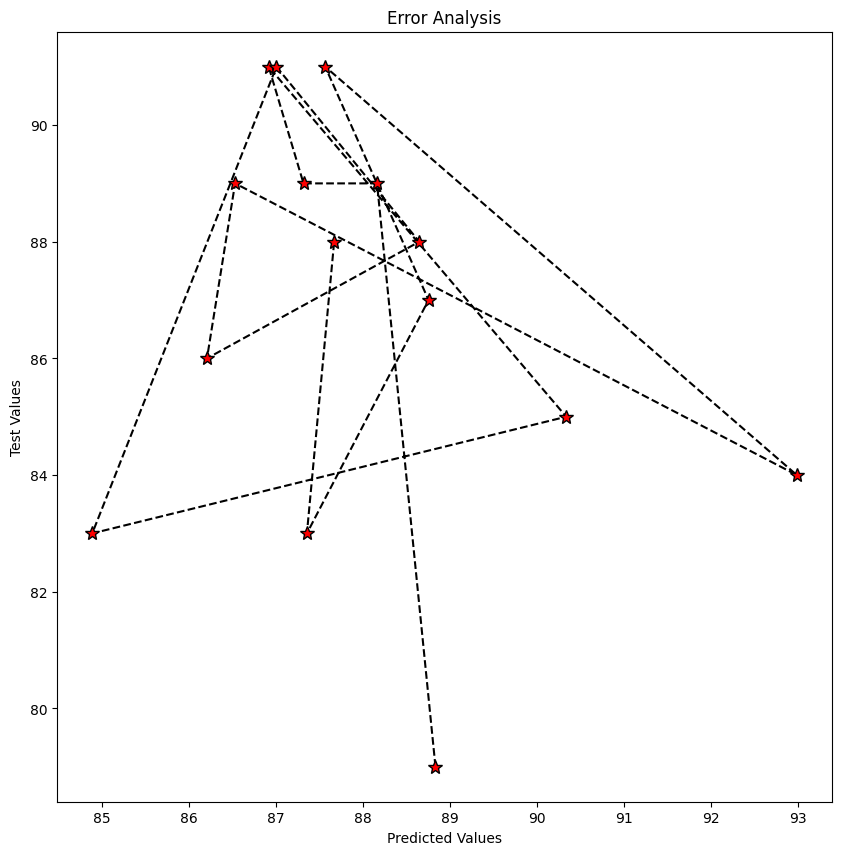

In [64]:
plt.figure(figsize=(10,10))
plt.plot(y_pred, y_test, color='black', linestyle='dashed', marker='*', markerfacecolor='red', markersize=10)
plt.title('Error Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')

In [66]:

# Cross validation score
X=df.loc[:,['Energy','Danceability']].values
y=df.loc[:,'Popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=MSE-abs(mse_mean)
print(diff)

-38.16003046094529
-19.082061800339424


In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
df_op = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [70]:
df_op

,Actual,Predicted
0,79,92
1,89,88
2,89,88
3,91,89
4,85,88
5,83,88
6,91,87
7,88,89
8,86,88
9,89,88


In [72]:
scores = cross_val_score(gnb,x_train, y_train, scoring='accuracy', cv=3).mean()*100
print(scores)


14.14141414141414
